# The Central Limit Theorem

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**Normal distributions** are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

#### Example: Normal Distribution

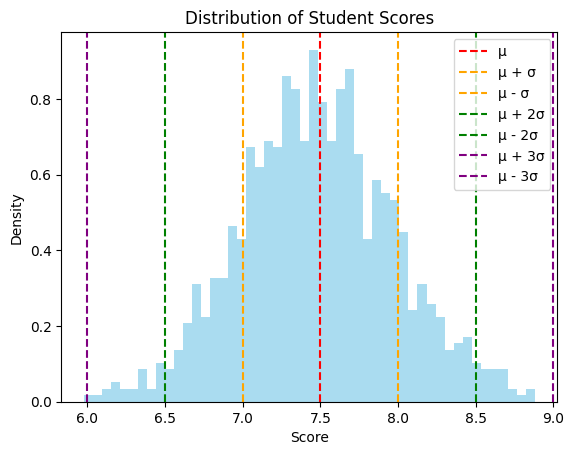

In [ ]:
# Generate random data with a normal distribution
np.random.seed(0)

mean = 7.5
std = 0.5
data = np.random.normal(loc=mean, scale=std, size=1000)

# Plot the histogram
plt.hist(data, bins=50, density=True, alpha=0.7, color='skyblue')

# Plot the mean and standard deviation lines
plt.axvline(mean, color='red', linestyle='--', label='μ')
plt.axvline(mean + std, color='orange', linestyle='--', label='μ + σ')
plt.axvline(mean - std, color='orange', linestyle='--', label='μ - σ')
plt.axvline(mean + 2 * std, color='green', linestyle='--', label='μ + 2σ')
plt.axvline(mean - 2 * std, color='green', linestyle='--', label='μ - 2σ')
plt.axvline(mean + 3 * std, color='purple', linestyle='--', label='μ + 3σ')
plt.axvline(mean - 3 * std, color='purple', linestyle='--', label='μ - 3σ')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Student Scores')

# Show the plot
plt.legend()
plt.show()

The **Central Limit Theorem** states that the distribution of sample means approximates a normal distribution regardless of the shape of the population distribution, under two conditions:

1. larger sample sizes (n > 30) are used, and
2. we repeat the sampling process many times (e.g., 1000 times)

That is, if we take $k=1000$ sample means $(\bar x_1, \bar x_2, ..., \bar x_k)$, each of which is of size, say, $n=50$, and draw the distribution of them, we get a the gaussian distribution, that is centered around the population mean $\mu$ that we are trying to estimate.


<img src="../assets/clt.jpg" alt="Figure: Central Limit Theorem">

Image Source: https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:IllustrationCentralTheorem.png

### Emperically Proving the Central Limit Theorem

In [ ]:
# Generate random samples from a uniform distribution
population = stats.uniform.rvs(size=1000) 

# Take samples of size 30 from the population
sample_size = 30
num_samples = 1000

samples = np.empty((num_samples, sample_size))
for i in range(num_samples):
    samples[i,] = np.random.choice(population, size=sample_size)

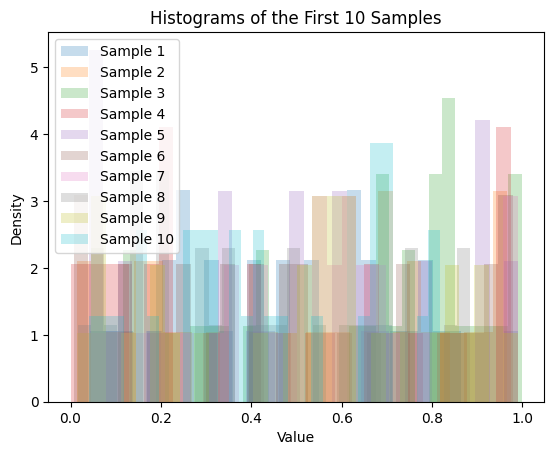

In [ ]:
import matplotlib.pyplot as plt

# Plot the histograms of the first 10 samples
samples_to_plot = 10
for i in range(samples_to_plot):
    plt.hist(samples[i], bins=30, density=True, alpha=0.25, label=f"Sample {i+1}")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histograms of the First {samples_to_plot} Samples")
plt.legend()
plt.show()


In [ ]:
sample_means = samples.mean(axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


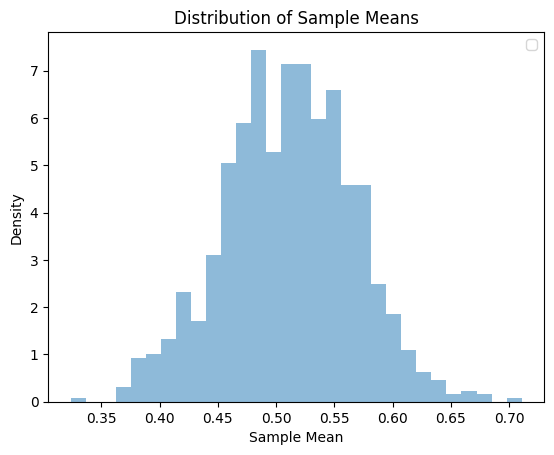

In [ ]:
plt.hist(sample_means, bins=30, density=True, alpha=0.50)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means")

plt.legend()
plt.show()